<a href="https://colab.research.google.com/github/Innocente001/Innocente001/blob/main/project_statistiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau, spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression, make_circles

import statsmodels.stats.multicomp as multi 
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/Maternal_Health_Risk_Data.csv' , sep = ';' )
df.head()

,Age_grossesse,Press_sang_Lower,Press_sang_Upper,Glycemie,Temp_Corpo,Press_Ateri,Niv_Risk,Situa_Econ,Milieu_Resid
0,25,130,80,15.0,98.0,86,high risk,poor,urban
1,35,140,90,13.0,98.0,70,high risk,rich,rural
2,29,90,70,8.0,100.0,80,high risk,rich,urban
3,30,140,85,7.0,98.0,70,high risk,rich,urban
4,35,120,60,6.1,98.0,76,low risk,poor,rural


In [3]:
#deux variables quantitative seront étudiés dans cas nous allons les afficher et les stockes dans un tableau etude1
etude1 = df[["Age_grossesse", "Glycemie"]]
print(etude1)

      Age_grossesse  Glycemie
0                25      15.0
1                35      13.0
2                29       8.0
3                30       7.0
4                35       6.1
...             ...       ...
1009             22      15.0
1010             55      18.0
1011             35      19.0
1012             43      18.0
1013             32       6.0

[1014 rows x 2 columns]


In [4]:
#Calculez la moyenne de chaque variable contenue dans etude1
stats = pd.DataFrame(etude1.mean(),columns = ['mean'])
stats

,mean
Age_grossesse,29.871795
Glycemie,8.725986


l'age moyen d'une femme enceinte est estimé a 28 ans et le taux de glycemie est environ 8

In [5]:
#Calculez la médiane de chaque variable  ajoutez une colonne médiane à stats
stats['median'] = etude1.median()
stats

,mean,median
Age_grossesse,29.871795,26.0
Glycemie,8.725986,7.5


In [6]:
#Hypothèse nulle: H0: "les deux variables sont indépendantes"
#Je vais vérifier par rapport à la valeur p, si p_value < 1%, on rejette H0 
#sinon on ne la rejette pas. 
from scipy.stats import pearsonr

Text(0, 0.5, 'Age_grossesse')

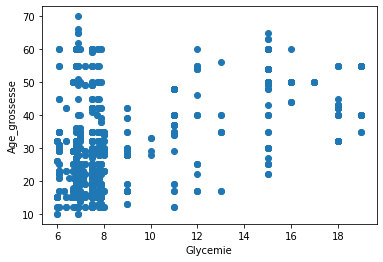

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['Glycemie'], df["Age_grossesse"],)
plt.xlabel("Glycemie")
plt.ylabel('Age_grossesse')

In [8]:
def Predict (X):
    return slope2 * X + intercept2

In [9]:
from scipy import stats
slope2 , intercept2 , r_value2, p_value2, std_err2 = stats.linregress(df['Glycemie'] , df['Age_grossesse'])

In [10]:
fitline2 = Predict(df['Glycemie'])

Text(0, 0.5, 'Age_grossesse')

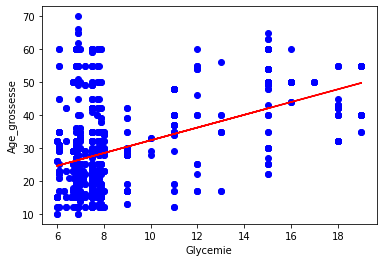

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Glycemie'] , df['Age_grossesse'] , c = 'b')
plt.plot(df['Glycemie'], fitline2 , c='r')
plt.xlabel('Glycemie')
plt.ylabel('Age_grossesse')

Certains points sont proches de la ligne, mais d'autres en sont éloignés, ce qui indique seulement une relation linéaire modérée entre les variables

In [14]:
df1= pd.DataFrame(pearsonr(df['Age_grossesse'] , df['Glycemie']) , index = ['pearson_coef' , 'p-value'] , columns = ['results'])
df1

,results
pearson_coef,4.732843e-01
p-value,9.845293e-58


D'après la valeur du coefficient de pearson, ce coeff est égale à 0.4
la p-value est egale a 0.000009 
 ces deux variables présentesnt une forte dépendance entre eux. 

 l'evolution du taux de glycemie depend de l'age de la grossesse
  

#Anova à 1 facteur
On effectue une analyse de variance pour mesurer l’indépendance entre une variable qualitative et une quantitative.

In [17]:
df.Niv_Risk.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

nous allons étudier l'age de grossesse et le niveau de risque 

3 types ont été détectés dans la variable Niv_Risk

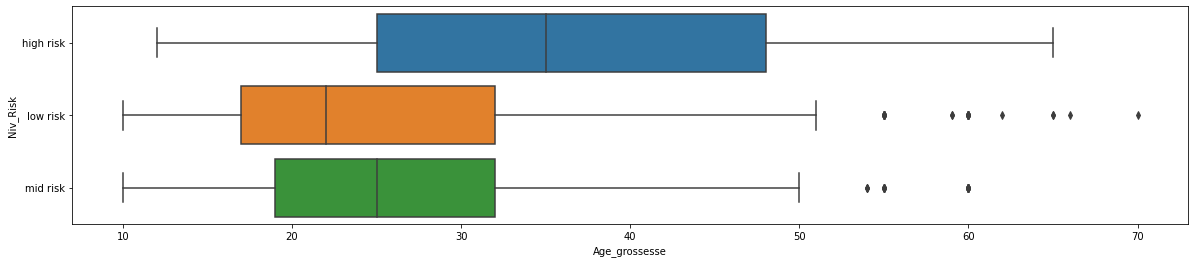

In [18]:
plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="Age_grossesse", y="Niv_Risk", data=df)

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [21]:
from scipy.stats import chi2_contingency

In [24]:
table = pd.crosstab(df['Niv_Risk'], df['Age_grossesse'])
table

Age_grossesse,10,12,13,14,15,16,17,18,19,20,...,54,55,56,59,60,62,63,65,66,70
Niv_Risk,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,...,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,...,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,...,3,8,0,0,14,0,0,0,0,0


D'après le tableau de contingence, on remarque que la variable continent continet 3 modalités différentes
On définit l'hypothèse null alors que la variable Niv_Risk n'a pas d'impact sur la variable Age_Grossesse,
On applique le test ANOVA en prenant un risque alpha = 5%

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Age_grossesse ~ Niv_Risk', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Niv_Risk,15375.347466,2.0,46.114005,6.829838e-20
Residual,168543.985868,1011.0,NaN,NaN
